# Richter's Predictor: Modeling Earthquake Damage

Based on aspects of building location and construction, the goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

The data was collected through surveys by [Kathmandu Living Labs](http://www.kathmandulivinglabs.org) and the [Central Bureau of Statistics](https://cbs.gov.np), which works under the National Planning Commission Secretariat of Nepal. This survey is **one of the largest post-disaster datasets ever collected**, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

<img src="img/eq_1.jpeg">

***
## Description of Features
***

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the `building_id` column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

**Description**

- `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
- `count_floors_pre_eq` (type: int): number of floors in the building before the earthquake.
- `age` (type: int): age of the building in years.
- `area_percentage` (type: int): normalized area of the building footprint.
- `height_percentage` (type: int): normalized height of the building footprint.
- `land_surface_condition` (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
- `foundation_type` (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
- `roof_type` (type: categorical): type of roof used while building. Possible values: n, q, x.
- `ground_floor_type` (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
- `other_floor_type` (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
- `position` (type: categorical): position of the building. Possible values: j, o, s, t.
- `plan_configuration` (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
- `has_superstructure_adobe_mud` (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
- `has_superstructure_mud_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
- `has_superstructure_stone_flag` (type: binary): flag variable that indicates if the superstructure was made of Stone.
- `has_superstructure_cement_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
- `has_superstructure_mud_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
- `has_superstructure_cement_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
- `has_superstructure_timber` (type: binary): flag variable that indicates if the superstructure was made of Timber.
- `has_superstructure_bamboo` (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
- `has_superstructure_rc_non_engineered` (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
- `has_superstructure_rc_engineered` (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
- `has_superstructure_other` (type: binary): flag variable that indicates if the superstructure was made of any other material.
- `legal_ownership_status` (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
- `count_families` (type: int): number of families that live in the building.
- `has_secondary_use` (type: binary): flag variable that indicates if the building was used for any secondary purpose.
- `has_secondary_use_agriculture` (type: binary): flag variable that indicates if the building was used for agricultural purposes.
- `has_secondary_use_hotel` (type: binary): flag variable that indicates if the building was used as a hotel.
- `has_secondary_use_rental` (type: binary): flag variable that indicates if the building was used for rental purposes.
- `has_secondary_use_institution` (type: binary): flag variable that indicates if the building was used as a location of any institution.
- `has_secondary_use_school` (type: binary): flag variable that indicates if the building was used as a school.
- `has_secondary_use_industry` (type: binary): flag variable that indicates if the building was used for industrial purposes.
- `has_secondary_use_health_post` (type: binary): flag variable that indicates if the building was used as a health post.
- `has_secondary_use_gov_office` (type: binary): flag variable that indicates if the building was used fas a government office.
- `has_secondary_use_use_police` (type: binary): flag variable that indicates if the building was used as a police station.
- `has_secondary_use_other` (type: binary): flag variable that indicates if the building was secondarily used for other purposes.



Features have information on aspects of structure's location and construction. For instance, three distinct `geo_level_id`'s (1,2, and 3 respectively) represent the district, municipality/VDC and ward location of the surveyed structure. `foundation_type`, `roof_type`, `has_superstructure_mud`, and many others like these give us information on different aspects of the building's construction. Some features are continuous, for example age, height percentage, etc., but most are categorical. Among the categorical ones, most are dummies, some have a few categories encoded with strings, and a few like `geo_level_2_id` and `geo_level_3_id` have way too many categories (more than 100) inside them. These different cases need to be handled accordingly.

In some of the categorical varaibles, it is not clear what the encoded characters representing different levels of the categorical variable really mean in the physical context of the structure. We were able to find the original dataset from which the data for this competition has most likely been subsampled. From that, we have gotten some more information on what different levels in each category could possiblly mean; however, we have not yet fully worked out what the character-encoded levels in some of our categorical variables exactly mean in the physical context.

***
## Description of Labels
***

We're trying to predict the ordinal variable `damage_grade`, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

- `1` represents low damage
- `2` represents a medium amount of damage
- `3` represents almost complete destruction

***
## Performance Metric
***

We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. (Ordinal regression is sometimes described as an problem somewhere in between classification and regression.)

To measure the performance of our algorithms, we'll use the F1 score which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

$$F_{micro} = \frac{2 \cdot P_{micro} \cdot R_{micro}}{P_{micro} + R_{micro}}$$

where

$$P_{micro} = \frac{\sum_{k=1}^{3}TP_{k}}{\sum_{k=1}^{3}(TP_{k} + FP_{k})},~~R_{micro} = \frac{\sum_{k=1}^{3}TP_{k}}{\sum_{k=1}^{3}(TP_{k} + FN_{k})}$$

and *TP* is True Positive, *FP* is False Positive, *FN* is False Negative, and *k* represents each class in 1,2,3.

In Python, we can easily calculate this loss using `sklearn.metrics.f1_score` with the keyword argument `average='micro'`. Here are some references that discuss the micro-averaged F1 score further:

- [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [Blog Post](http://rushdishams.blogspot.com/2011/08/micro-and-macro-average-of-precision.html)

## What is this important?


In April, 2015, a 7.8 magnitude earthquake with an epicenter in the Gorkha District of Nepal devastated the surrounding area, resulting in almost 9,000 deaths and 22,000 injuries. Some of these casualties happened in buildings that collapsed in the earthquake, and may have been preventable if they had withstood the initial ground motion or resulting aftershocks.

Using data on buildings in the affected area and how they were impacted by the earthquake, we'd like to model risk of damage. Accurate models of this kind help first responders plan their initial triage after an earthquake, and help governments direct scarce resources which may be available to mitigate risk before another earthquake happens.

The goal is to predict buildings at risk of earthquake damage. Based on aspects of building location and construction, my goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

This dataset is used to determine the damage grade (low, medium, destructed) correspond to construction attributes and quality. The objective is to propose a machine learning kernel and predict the damage grade accurately. It can be applied to any country or region with similar construction attribute to predict potential damage grade and further enhance their construction work.

The prediction is useful when performing pre-construction earthquake-proof quality determination, construction enhancement work analysis, and post-earthquake fragility quick analysis. By compare to other earthquakes related prediction such as Earthquake prediction that relies on the seismic signal. They are trying to predict the occurrence probability, location, and magnitude with a time-independent machine learning model to create alert for the public. But it is an extremely difficult task due to extraordinarily stochastic. Another prediction example is LANL prediction, this prediction is used to activate the modern failsafe system and mitigate the earthquake damage by working on acoustic and time-series data to predict the final time to failure. In conclusion, construction attribute-based predictions are valuable as it can determine what construction type is cost-effective in reducing damage and save people from earthquake damage.

In [1]:
import pandas as pd
import numpy as np
import os
import re

import string 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import sklearn

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve, confusion_matrix

import xgboost as xgb

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
# Load data set
train = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv'))

In [6]:
test_predict = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv'))

In [7]:
labels = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv'))

In [8]:
labels.damage_grade.value_counts()/len(labels.damage_grade)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

**Remarks:**

- According to these results, we can say that there are 56.89% of the building suffered a medium amount of damage, 33.46% of the building were almost completely distructed and 9.64% of the building suffered a low damage.

- Class "low damage" is imbalanced, and might need upsampling. Another option to deal with the imbalance is to choose an appropriate metric, like F1 score or AUC.

In [9]:
train.dtypes.value_counts()

int64     31
object     8
dtype: int64

In [10]:
print('Object data types:\n')
# we'll use the function later, without wanting to print anything
def get_obj(train, p = False):
    obj_types = []
    for column in train.columns:
        if train[column].dtype == 'object': 
            if p: print(column)
            obj_types.append(column)
    return obj_types
obj_types = get_obj(train, True)

Object data types:

land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
plan_configuration
legal_ownership_status


In [11]:
def transform_to_int(train, obj_types):
    # Assign dictionaries with current values and replacements for each column
    d_lsc = {'n':0, 'o':1, 't':2}
    d_ft = {'h':0, 'i':1, 'r':2, 'u':3, 'w':4}
    d_rt = {'n':0, 'q':1, 'x':2}
    d_gft = {'f':0, 'm':1, 'v':2, 'x':3, 'z':4}
    d_oft = {'j':0, 'q':1, 's':2, 'x':3}
    d_pos = {'j':0, 'o':1, 's':2, 't':3}
    d_pc = {'a':0, 'c':1, 'd':2, 'f':3, 'm':4, 'n':5, 'o':6, 'q':7, 's':8, 'u':9}
    d_los = {'a':0, 'r':1, 'v':2, 'w':3}
    # Each positional index in replacements corresponds to the column in obj_types
    replacements = [d_lsc, d_ft, d_rt, d_gft, d_oft, d_pos, d_pc, d_los]

    # Replace using lambda Series.map(lambda)
    for i,col in enumerate(obj_types):
        train[col] = train[col].map(lambda a: replacements[i][a]).astype('int64')
transform_to_int(train, obj_types)

In [12]:
train.dtypes.value_counts()

int64    39
dtype: int64

In [13]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


***
**Data Splitting**
***

In [14]:
# XGBoost expects target classes in the form [0, numclass)
labels['damage_grade'] = labels['damage_grade'].apply(lambda x: x-1)
labels.head()

,building_id,damage_grade
0,802906,2
1,28830,1
2,94947,2
3,590882,1
4,201944,2


In [15]:
y = labels.pop('damage_grade')  
x = train.drop(['building_id'],axis=1)

In [16]:
print('Original dataset shape:', x.shape)
print('Original labelset shape:', y.shape)

Original dataset shape: (260601, 38)
Original labelset shape: (260601,)


In [17]:
# keep the same random state for reproducibility
RANDOM_STATE = 12
TRAIN_TEST_SPLIT_SIZE = .1
VALIDATION_SPLIT_SIZE = .2

In [18]:
# stratify on damage_grade
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, 
                                                    test_size = TRAIN_TEST_SPLIT_SIZE, 
                                                    stratify = y,
                                                    random_state = RANDOM_STATE)

In [19]:
# stratify on damage_grade
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, 
                                                    test_size = VALIDATION_SPLIT_SIZE, 
                                                    stratify = y_train_val,
                                                    random_state = RANDOM_STATE)

In [20]:
print('Training dataset shape:', x_train.shape)
print('Training labelset shape:', y_train.shape)

Training dataset shape: (187632, 38)
Training labelset shape: (187632,)


In [21]:
print('Test labelset shape:', y_test.shape)
print('Test dataset shape:', x_test.shape)

Test labelset shape: (26061,)
Test dataset shape: (26061, 38)


In [22]:
print('Validation dataset shape:', x_val.shape)
print('Validation labelset shape:', y_val.shape)

Validation dataset shape: (46908, 38)
Validation labelset shape: (46908,)


***
**Functions**
***

In [23]:
# setup color scheme and standard figure size for all figures
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [24]:
def plot_cfm(labels, predictions, p = 0.5):
    cfm = metrics.confusion_matrix(labels, predictions > p)
    plt.figure(figsize = (5,5))
    sns.heatmap(cfm, annot = True, fmt = "d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')

    print('True Negatives: ', cfm[0][0])
    print('False Positives: ', cfm[0][1])
    print('False Negatives: ', cfm[1][0])
    print('True Positives: ', cfm[1][1])

In [25]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)
    roc_auc = metrics.auc(fp, tp)    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fp, tp, label = name + ' AUC = %0.2f' % roc_auc, linewidth=2, **kwargs)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linewidth=2, color=colors[6], linestyle=':')
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [26]:
def custom_f1_score(predicted, d_train):
    labels = d_train.get_label().astype(np.int)
    predicted = (predicted >= 0.5).astype(np.int)
    return [('f1_score', f1_score(labels, np.argmax(predicted, axis = 1), average = 'micro'))]

In [27]:
def init_params():
#     Initialize with default parameters
    PARAMETERS['max_depth'] = 6
    PARAMETERS['min_child_weight'] = 1
    PARAMETERS['eta'] = .3
    PARAMETERS['subsample'] = 1
    PARAMETERS['colsample_bytree'] = 1
    PARAMETERS['num_class'] = 3
    PARAMETERS['objective'] = 'multi:softmax'
    PARAMETERS['verbosity'] = 0
    return PARAMETERS

In [28]:
def cross_validation(PARAMETERS, d_train):
    cv_results = xgb.cv(PARAMETERS,
        d_train,
        feval = custom_f1_score,
        num_boost_round = NUM_BOOST_ROUNDS,
        maximize = True,
        seed = RANDOM_SEED,
        nfold = 5,
        early_stopping_rounds = EARLY_STOPPING_ROUNDS
    )
    return cv_results

***
**XGBoost**
***

Extreme Gradient Boosting (xgboost) is an advanced implementation of the gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. 

Some key benefits of XGBoost are:

- Regularization - helps in reducing overfitting

- Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.

- Handling Missing Values - It has an in-built routine to handle missing values.

- Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process

***
**Hyperparameter Tuning**
***

XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them. I used these guides for ideas on how to tune the model:

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e

***
**Quick note on the method**
***

In an ideal world, with infinite resources and where time is not an issue, I could run a giant grid search with all the parameters together and find the optimal solution. Perhaps it is still doable with really small datasets, but for this dataset (which is by far not the largest), the training time was growing exponentially, and each step in the tuning process was becoming more and more expensive.

In practice this approach is rarely feasible, so instead I'll go through the parameters one or two at a time. After careful reading, I decided to tune 5 of the hyperparameters that usually have a big impact on the performance. In theory it would be necessary to test all combinations to ensure we find THE optimal solution, but here I will try to find a good enough one by improving the model with a reasonable number of steps.

**Approach for Parameter Tuning**

- Choose a relatively high learning rate. The default learning rate of 0.3 used at this stage.

- Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

- Tune the learning rate.

- Finally tune gamma to avoid overfitting (optional).

- Determine the optimum number of trees. XGBoost also has its own cv function which performs cross-validation at each boosting iteration and returns the optimum number of trees required. I will set a very high number of trees (or num_boost_round in XGBoost terminology and rely on early stopping.

***
**Using XGBoost’s CV**

In order to tune the hyperparameters, I will use the cv function from XGBoost. It allows  to run cross-validation on the training dataset and returns a score (either built-in or customly defined).
It requires the following inputs:
- params: dictionary of parameters.
- dtrain matrix.
- num_boost_round: number of boosting rounds. Here I will use a large number and count on early_stopping_rounds to find the optimal number of rounds before reaching the maximum.
- seed: random seed. It's important to set a seed here, to ensure we are using the same folds for each step so we can properly compare the scores with different parameters.
- nfold: the number of folds to use for cross-validation. Setting this to 5, same as for the other classifiers.
- metrics: the metrics to use to evaluate the model. For this part I have defined a custom F1 score metric, since XGBoost does not have one natively, and I wanted to compare to other classifiers using the same metric.


**A note about num_boost_round and early_stopping_rounds**

XGBoost is a gradient boosting method, as such it adds trees in every iteration to improve the prediction accuracy (performance). 

The prediction performance increases when you add more and more trees until it starts to overfit, at which point the it will start to decrease. So we need to find that optimum number of trees. It is basically impossible to guess this number, and this is what XGBoost.cv is for. It partitions the training data into two subsets. The first subset is used to train XGBoost, the second is used as a validation set. After each iteration (which adds an additional tree) XGBoost calculates the new validation error. With that XGBoost is able to detect when it starts to overfit (when the chosen evaluation metric starts to either increase (loss), or decrease (our custom F1 score)). This will give us the optimal number of trees for a given set of hyperparameters.

The num_boost_rounds (number of trees) parameter is not part of the PARAMETERS dictionary, but it is also a tunable parameter. num_boost_round corresponds to the number of boosting rounds or trees to build. Its optimal value highly depends on the other parameters. This means it should be re-tuned each time we update a parameter. I could do this by tuning it together with all parameters in the grid-search, but it requires a lot of computational effort. Fortunately XGBoost provides a nice way to find the best number of rounds while training. Since trees are built sequentially, instead of fixing the number of rounds at the beginning, we can test our model at each step and see if adding a new tree/boost round improves performance. If the performance hasn’t improved for a specific number of rounds (as defined by the variable early_stopping_round), we stop the training and keep the best number of boosting rounds. 


I've decided here to use the XGBoost algorithm directly for tuning (mostly because it makes cross validation easy), there is also a scikit learn wrapper around XGBoost called XGBRegressor. The XGBoost algorithm is more customizeable, but the scikit learn wrapper plays more nicely with pipelines (and doesn't need DMatrix input).

Instead of numpy arrays or pandas data frames, XGBoost uses DMatrices. A DMatrix can contain both the features and the target. The data is already loaded into arrays, so I can use them to create the DMatrix.

In [29]:
# A DMatrix can contain both the features and the target.
d_train = xgb.DMatrix(x_train, label = y_train.ravel()) 
d_test = xgb.DMatrix(x_test, label = y_test.ravel())
d_val = xgb.DMatrix(x_val, label = y_val.ravel())
watchlist = [(d_train, 'train'), (d_val, 'val')]

In [30]:
# Initialize with default parameters
PARAMETERS = {
     'objective':'binary:logistic',
     'max_depth': 6,
     'min_child_weight': 1,
     'eta': .3,
     'subsample': 1,
     'colsample_bytree': 1,
     'num_class': 3,
     'verbosity': 0,
     'objective': 'multi:softmax'
  }

In [31]:
RANDOM_SEED = 12
NUM_BOOST_ROUNDS = 1000
EARLY_STOPPING_ROUNDS = 20

**Tune max_depth and min_child_weight**

I'll tune these concurrently using a basic grid search, meaning I'll test all combinations of the two variables in a certain range. Whichever combination has the best cross validation score, will be set as values for the next round.

- max_depth is the largest depth allowed on any decision tree in the ensemble, where tree depth is the number of nodes from the root down to the farthest away leaf. Larger max_depth values allow for more complex trees, which means a larger chance of capturing complicated features but also a larger chance of overfitting.
- min_child_weight is a regularization factor that changes how often tree nodes split in tree creation. Only nodes with a hessian (second order partial derivative) larger than min_child_weight are allowed to split. Smaller min_child_weight values mean more complex trees, and therefore more chance of overfitting.

In [32]:
# Tune max_depth and min_child_weight
gs_space = [
    (max_depth, min_child_weight)
    for max_depth in range(3,10,2)
        for min_child_weight in range(1,6,2)
]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gs_space:
    print("Performing cross validation for parameters max_depth = {}, min_child_weight = {}".format(max_depth, min_child_weight))
    
    # Update parameters
    PARAMETERS['max_depth'] = max_depth
    PARAMETERS['min_child_weight'] = min_child_weight
    
    # Run cross validation
    cv_results = cross_validation(PARAMETERS, d_train)
    
    # Find best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    
    boost_rounds = np.argmax(cv_results['test-f1_score-mean'])    
    print("\tF1 Score {} reached after {} rounds".format(mean_f1, boost_rounds))    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth, min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

Performing cross validation for parameters max_depth = 3, min_child_weight = 1
	F1 Score 0.6344172 reached after 24 rounds
Performing cross validation for parameters max_depth = 3, min_child_weight = 3
	F1 Score 0.6341082 reached after 24 rounds
Performing cross validation for parameters max_depth = 3, min_child_weight = 5
	F1 Score 0.63349 reached after 23 rounds
Performing cross validation for parameters max_depth = 5, min_child_weight = 1
	F1 Score 0.6870470000000001 reached after 999 rounds
Performing cross validation for parameters max_depth = 5, min_child_weight = 3
	F1 Score 0.6854427999999999 reached after 883 rounds
Performing cross validation for parameters max_depth = 5, min_child_weight = 5
	F1 Score 0.6841692 reached after 685 rounds
Performing cross validation for parameters max_depth = 7, min_child_weight = 1
	F1 Score 0.6904578 reached after 409 rounds
Performing cross validation for parameters max_depth = 7, min_child_weight = 3
	F1 Score 0.6900316 reached after 403 ro

In [33]:
# Update max_depth and min_child_weight parameters.
PARAMETERS['max_depth'] = best_params[0]
PARAMETERS['min_child_weight'] = best_params[1]

**Tune subsample and colsample**

- subsample is the fraction of datapoints (rows of the training data) to sample at each round (each tree), with 0 meaning no rows are sampled and 1 meaning all rows are sampled. The higher the value, the more likely to overfit the data.
- colsample_bytree is the fraction of features (columns of the training data) to sample at each round (each tree), with 0 meaning no columns are sampled and 1 meaning all columns are sampled. The higher the value, the more likely to overfit the data.

In [34]:
# Tuning subsample and colsample
gs_space = [
    (subsample, colsample_bytree)
    for subsample in [i/10. for i in range(5,10)]
    for colsample_bytree in [i/10. for i in range(5,10)] 
]
max_f1 = 0. 
best_params = None 
for subsample, colsample_bytree in gs_space:
    print("Performing cross validation for parameters subsample = {}, colsample_bytree = {}".format(subsample, colsample_bytree))
    
    # Update parameters
    PARAMETERS['colsample_bytree'] = colsample_bytree
    PARAMETERS['subsample'] = subsample
    
    # Run cross validation
    cv_results = cross_validation(PARAMETERS, d_train)

    # Find best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = np.argmax(cv_results['test-f1_score-mean'])    
    print("\tF1 Score {} reached after {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample_bytree) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

Performing cross validation for parameters subsample = 0.5, colsample_bytree = 0.5
	F1 Score 0.6951052 reached after 308 rounds
Performing cross validation for parameters subsample = 0.5, colsample_bytree = 0.6
	F1 Score 0.695425 reached after 259 rounds
Performing cross validation for parameters subsample = 0.5, colsample_bytree = 0.7
	F1 Score 0.6951854 reached after 178 rounds
Performing cross validation for parameters subsample = 0.5, colsample_bytree = 0.8
	F1 Score 0.6949240000000001 reached after 216 rounds
Performing cross validation for parameters subsample = 0.5, colsample_bytree = 0.9
	F1 Score 0.6971145999999999 reached after 253 rounds
Performing cross validation for parameters subsample = 0.6, colsample_bytree = 0.5
	F1 Score 0.6969226 reached after 266 rounds
Performing cross validation for parameters subsample = 0.6, colsample_bytree = 0.6
	F1 Score 0.69793 reached after 272 rounds
Performing cross validation for parameters subsample = 0.6, colsample_bytree = 0.7
	F1 Sc

In [35]:
# Update subsample and colsample_bytree
PARAMETERS['subsample'] = best_params[0]
PARAMETERS['colsample_bytree'] = best_params[1]

**Tune eta**

Eta in XGBoost works the same way as a learning_rate, in the sense that it controls how quickly each step changes. The smaller the eta, the smaller each step, which means the algorithm will likely take more steps to converge.

In [36]:
# Tune the learning rate.
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("Performing cross validation for parameter eta = {}".format(eta))
    
    # Update ETA
    PARAMETERS['eta'] = eta
    
    # Run cross validation
    cv_results = cross_validation(PARAMETERS, d_train)

    # Find best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = np.argmax(cv_results['test-f1_score-mean'])    
    print("\tF1 Score {} reached after {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

Performing cross validation for parameter eta = 0.3
	F1 Score 0.7056526000000001 reached after 544 rounds
Performing cross validation for parameter eta = 0.2
	F1 Score 0.7043468 reached after 482 rounds
Performing cross validation for parameter eta = 0.1
	F1 Score 0.7048798000000001 reached after 784 rounds
Performing cross validation for parameter eta = 0.05
	F1 Score 0.6989744 reached after 999 rounds
Performing cross validation for parameter eta = 0.01
	F1 Score 0.645279 reached after 52 rounds
Performing cross validation for parameter eta = 0.005
	F1 Score 0.6427102 reached after 35 rounds
Best params: 0.3, F1 Score: 0.7056526000000001


In [37]:
# Update eta.
PARAMETERS['eta'] = best_params

Let’s have a look at the final list of tuned parameters.

In [38]:
PARAMETERS

{'objective': 'multi:softmax',
 'max_depth': 9,
 'min_child_weight': 3,
 'eta': 0.3,
 'subsample': 0.9,
 'colsample_bytree': 0.6,
 'num_class': 3,
 'verbosity': 0}

Finally I can now use these tuned parameters in the xgboost model. I will set a very high num_boost_round and rely on early stopping if the model performance doesn’t improve in 20 rounds.

In [39]:
xgb_model = xgb.train(
    PARAMETERS,
    d_train,
    feval = custom_f1_score,
    num_boost_round = NUM_BOOST_ROUNDS,
    maximize = True,
    evals = watchlist,
    early_stopping_rounds = EARLY_STOPPING_ROUNDS, 
    verbose_eval=True)

[0]	train-mlogloss:0.95806	train-f1_score:0.66739	val-mlogloss:0.96140	val-f1_score:0.66106
[1]	train-mlogloss:0.88199	train-f1_score:0.66727	val-mlogloss:0.88738	val-f1_score:0.65904
[2]	train-mlogloss:0.81725	train-f1_score:0.66458	val-mlogloss:0.82481	val-f1_score:0.65669
[3]	train-mlogloss:0.78058	train-f1_score:0.66426	val-mlogloss:0.79020	val-f1_score:0.65718
[4]	train-mlogloss:0.74966	train-f1_score:0.66698	val-mlogloss:0.76048	val-f1_score:0.66038
[5]	train-mlogloss:0.72767	train-f1_score:0.66736	val-mlogloss:0.74009	val-f1_score:0.65914
[6]	train-mlogloss:0.70435	train-f1_score:0.66741	val-mlogloss:0.71834	val-f1_score:0.65938
[7]	train-mlogloss:0.68631	train-f1_score:0.66919	val-mlogloss:0.70231	val-f1_score:0.66144
[8]	train-mlogloss:0.67207	train-f1_score:0.67017	val-mlogloss:0.68969	val-f1_score:0.66153
[9]	train-mlogloss:0.66358	train-f1_score:0.66961	val-mlogloss:0.68237	val-f1_score:0.66114
[10]	train-mlogloss:0.65193	train-f1_score:0.67246	val-mlogloss:0.67264	val-f1_s

[89]	train-mlogloss:0.49696	train-f1_score:0.72361	val-mlogloss:0.58563	val-f1_score:0.69278
[90]	train-mlogloss:0.49644	train-f1_score:0.72383	val-mlogloss:0.58548	val-f1_score:0.69314
[91]	train-mlogloss:0.49584	train-f1_score:0.72434	val-mlogloss:0.58539	val-f1_score:0.69332
[92]	train-mlogloss:0.49485	train-f1_score:0.72473	val-mlogloss:0.58509	val-f1_score:0.69351
[93]	train-mlogloss:0.49414	train-f1_score:0.72541	val-mlogloss:0.58492	val-f1_score:0.69312
[94]	train-mlogloss:0.49350	train-f1_score:0.72563	val-mlogloss:0.58490	val-f1_score:0.69319
[95]	train-mlogloss:0.49267	train-f1_score:0.72601	val-mlogloss:0.58478	val-f1_score:0.69317
[96]	train-mlogloss:0.49211	train-f1_score:0.72611	val-mlogloss:0.58466	val-f1_score:0.69314
[97]	train-mlogloss:0.49132	train-f1_score:0.72638	val-mlogloss:0.58429	val-f1_score:0.69344
[98]	train-mlogloss:0.49083	train-f1_score:0.72653	val-mlogloss:0.58417	val-f1_score:0.69361
[99]	train-mlogloss:0.48962	train-f1_score:0.72713	val-mlogloss:0.5838

[177]	train-mlogloss:0.43879	train-f1_score:0.74962	val-mlogloss:0.57415	val-f1_score:0.70131
[178]	train-mlogloss:0.43799	train-f1_score:0.74995	val-mlogloss:0.57396	val-f1_score:0.70148
[179]	train-mlogloss:0.43751	train-f1_score:0.75017	val-mlogloss:0.57397	val-f1_score:0.70163
[180]	train-mlogloss:0.43712	train-f1_score:0.75040	val-mlogloss:0.57396	val-f1_score:0.70165
[181]	train-mlogloss:0.43663	train-f1_score:0.75056	val-mlogloss:0.57396	val-f1_score:0.70163
[182]	train-mlogloss:0.43624	train-f1_score:0.75067	val-mlogloss:0.57389	val-f1_score:0.70163
[183]	train-mlogloss:0.43562	train-f1_score:0.75096	val-mlogloss:0.57395	val-f1_score:0.70186
[184]	train-mlogloss:0.43489	train-f1_score:0.75162	val-mlogloss:0.57394	val-f1_score:0.70178
[185]	train-mlogloss:0.43433	train-f1_score:0.75186	val-mlogloss:0.57388	val-f1_score:0.70195
[186]	train-mlogloss:0.43376	train-f1_score:0.75238	val-mlogloss:0.57377	val-f1_score:0.70229
[187]	train-mlogloss:0.43334	train-f1_score:0.75252	val-mlog

[265]	train-mlogloss:0.39729	train-f1_score:0.76853	val-mlogloss:0.57359	val-f1_score:0.70677
[266]	train-mlogloss:0.39682	train-f1_score:0.76872	val-mlogloss:0.57359	val-f1_score:0.70662
[267]	train-mlogloss:0.39646	train-f1_score:0.76880	val-mlogloss:0.57358	val-f1_score:0.70649
[268]	train-mlogloss:0.39602	train-f1_score:0.76916	val-mlogloss:0.57357	val-f1_score:0.70651
[269]	train-mlogloss:0.39539	train-f1_score:0.76961	val-mlogloss:0.57354	val-f1_score:0.70692
[270]	train-mlogloss:0.39484	train-f1_score:0.76975	val-mlogloss:0.57360	val-f1_score:0.70694
[271]	train-mlogloss:0.39445	train-f1_score:0.76997	val-mlogloss:0.57365	val-f1_score:0.70709
[272]	train-mlogloss:0.39393	train-f1_score:0.77024	val-mlogloss:0.57364	val-f1_score:0.70713
[273]	train-mlogloss:0.39358	train-f1_score:0.77034	val-mlogloss:0.57373	val-f1_score:0.70698
[274]	train-mlogloss:0.39305	train-f1_score:0.77040	val-mlogloss:0.57378	val-f1_score:0.70709
[275]	train-mlogloss:0.39263	train-f1_score:0.77070	val-mlog

In [40]:
# XGBoost returns probabilities by default.
y_probas_train = xgb_model.predict(d_train)
y_probas_test = xgb_model.predict(d_test)

In [41]:
y_pred_test = np.round(y_probas_test)

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

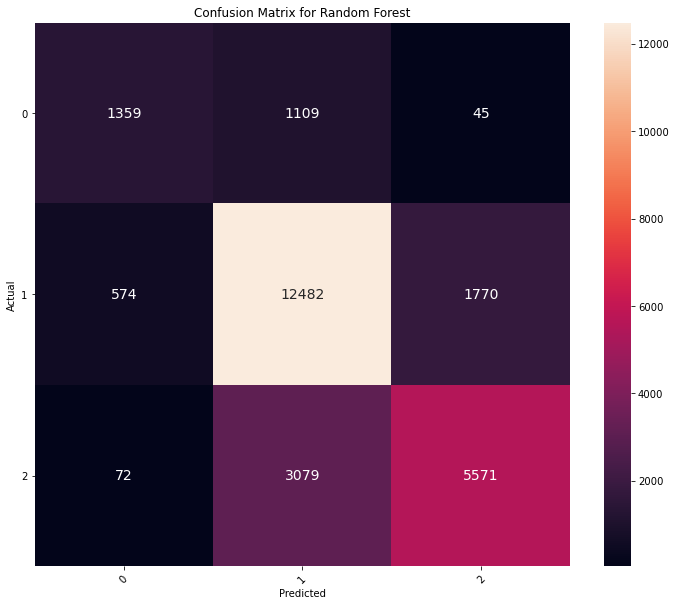

In [42]:
df_cm_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns=np.unique(y_test), index = np.unique(y_test))
df_cm_rf.index.name = 'Actual'
df_cm_rf.columns.name = 'Predicted'

sns.heatmap(df_cm_rf, annot=True, fmt='d', annot_kws={"size": 14})
plt.title("Confusion Matrix for Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)

In [43]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60      2513
           1       0.75      0.84      0.79     14826
           2       0.75      0.64      0.69      8722

    accuracy                           0.74     26061
   macro avg       0.73      0.67      0.70     26061
weighted avg       0.74      0.74      0.74     26061



In [44]:
f1 = f1_score(y_test, y_pred_test, average='micro')
print('f1 score: %.2f' % f1)

f1 score: 0.74


In [45]:
import joblib
# save
joblib.dump(xgb_model, "./xgb.joblib")

['./xgb.joblib']

In [46]:
# load, no need to initialize the loaded model
loaded_xgb = joblib.load("./xgb.joblib")

In [48]:
transform_to_int(test_predict, obj_types)

In [49]:
test_predict = test_predict.drop(["building_id"],axis=1)

In [52]:
d_test_predict = xgb.DMatrix(test_predict)

In [54]:
predictions = xgb_model.predict(d_test_predict)

In [55]:
submission_format = pd.read_csv('Richters_Predictor_Modeling_Earthquake_Damage_-_Submission_Format.csv', index_col='building_id')

In [56]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [57]:
my_submission.head()

,damage_grade
building_id,
300051,2.0
99355,1.0
890251,1.0
745817,0.0
421793,2.0


In [58]:
my_submission['damage_grade'] = my_submission['damage_grade'].apply(lambda x: x+1)
my_submission.head()

,damage_grade
building_id,
300051,3.0
99355,2.0
890251,2.0
745817,1.0
421793,3.0


In [59]:
my_submission['damage_grade'] = my_submission['damage_grade'].astype(int)
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [60]:
my_submission.to_csv('submission.csv')

In [61]:
!head submission.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,1
421793,3
871976,2
691228,1
896100,3
343471,2


In [64]:
from xgboost import plot_tree
import shap

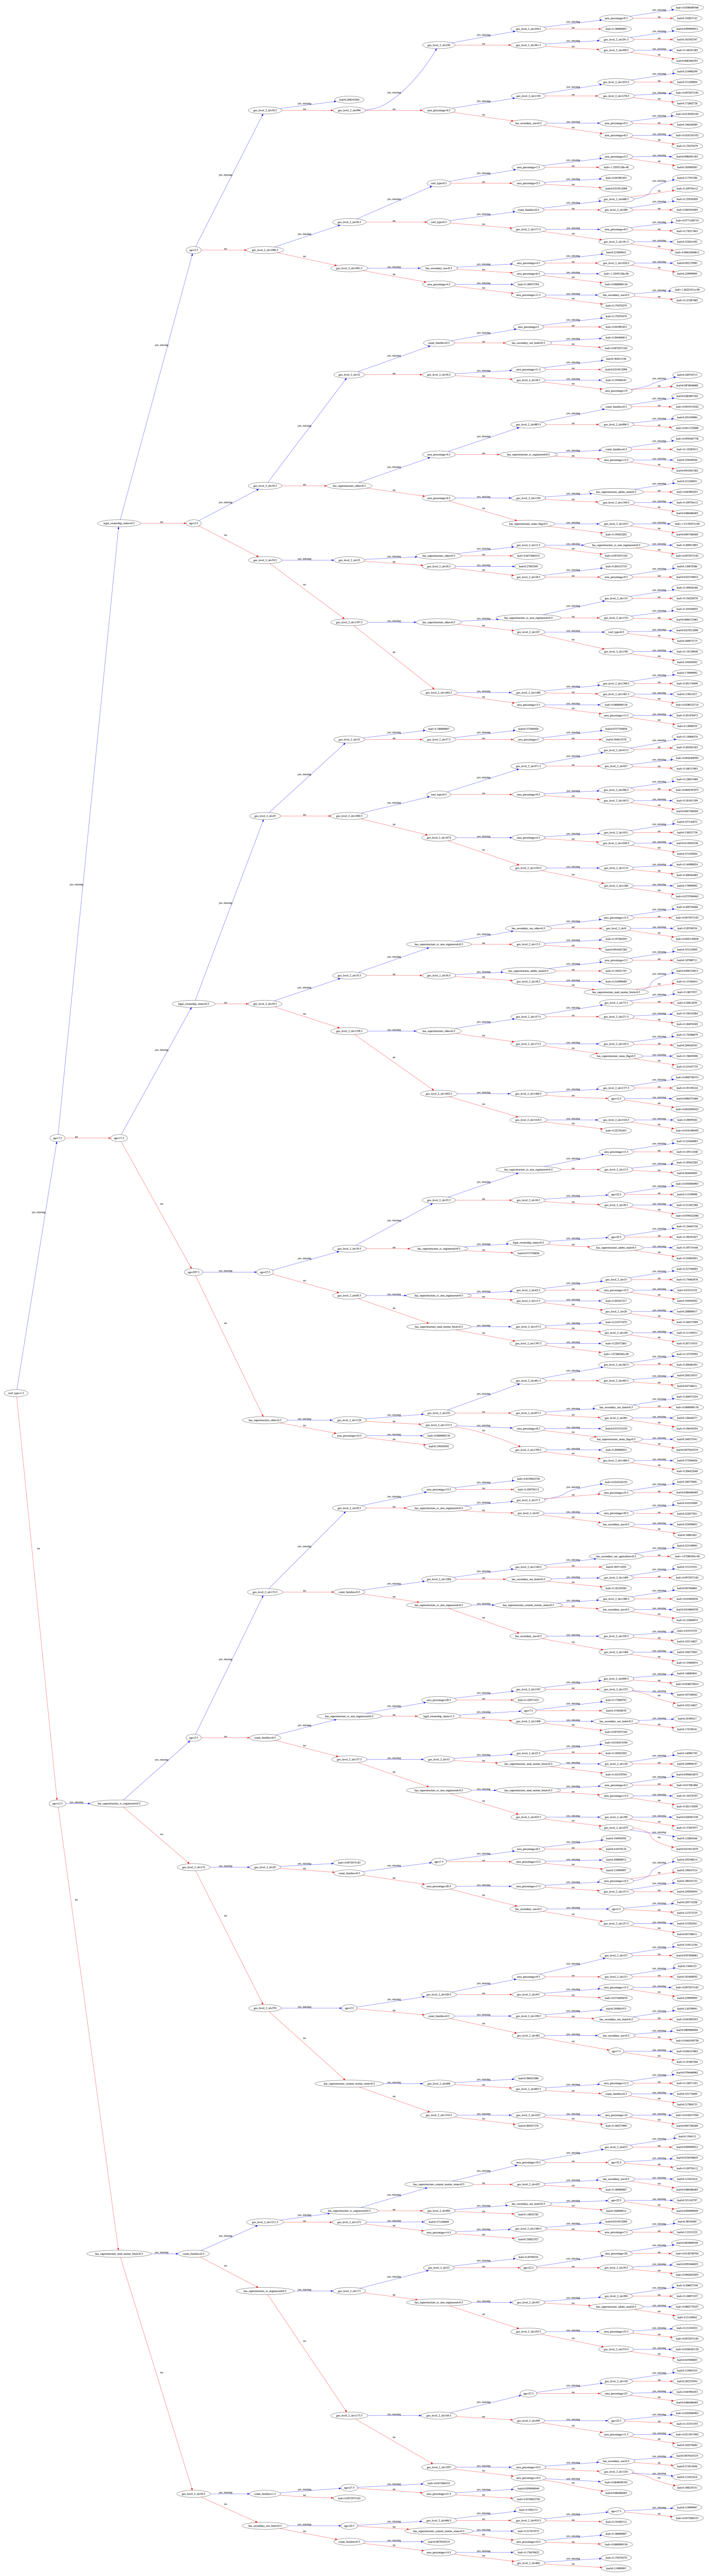

In [73]:
# plot single tree
xgb.plot_tree(xgb_model, num_trees = 0, rankdir = 'LR')
fig = mpl.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

In [72]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(test_predict)

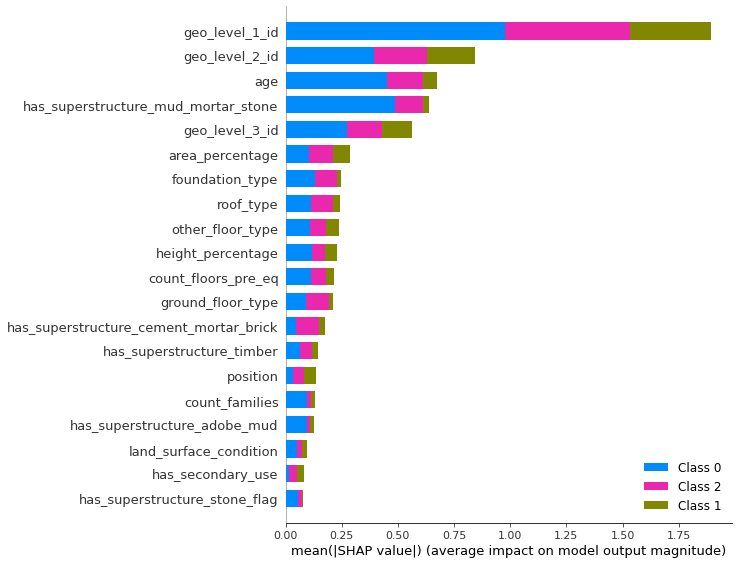

In [74]:
shap.summary_plot(shap_values, test_predict, plot_type = "bar")

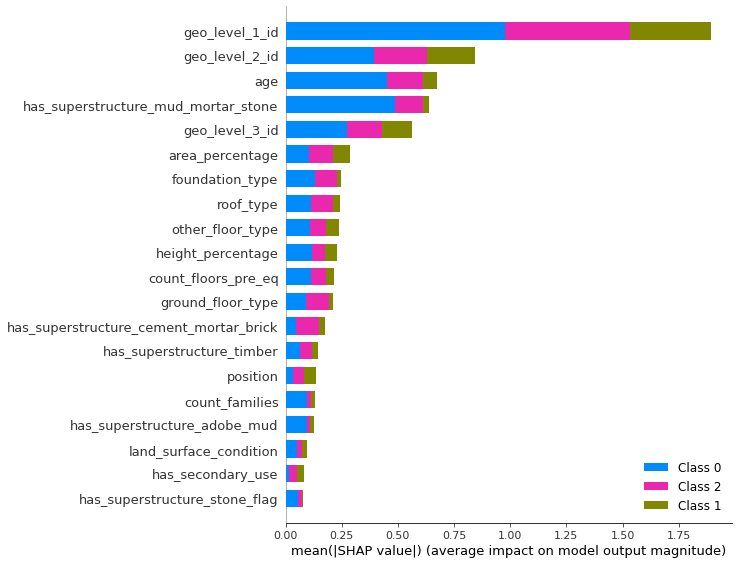

In [75]:
shap.summary_plot(shap_values, test_predict)